In [ ]:
pip install --upgrade networkx

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import csv
import random
import statistics


In [ ]:

from collections import Counter

In [ ]:
#Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
path = "/content/CA-GrQc.txt"
print(path)

/content/CA-GrQc.txt


In [ ]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'CA-GrQc.txt'],
 ['#',
  'Collaboration',
  'network',
  'of',
  'Arxiv',
  'General',
  'Relativity',
  'category',
  '(there',
  'is',
  'an',
  'edge',
  'if',
  'authors',
  'coauthored',
  'at',
  'least',
  'one',
  'paper)'],
 ['#', 'Nodes:', '5242', 'Edges:', '28980'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['3466', '937'],
 ['3466', '5233'],
 ['3466', '8579'],
 ['3466', '10310'],
 ['3466', '15931'],
 ['3466', '17038'],
 ['3466', '18720'],
 ['3466', '19607'],
 ['10310', '1854'],
 ['10310', '3466'],
 ['10310', '4583'],
 ['10310', '5233'],
 ['10310', '9572'],
 ['10310', '10841'],
 ['10310', '13056'],
 ['10310', '14982'],
 ['10310', '16310'],
 ['10310', '19640'],
 ['10310', '23855'],
 ['10310', '24372'],
 ['10310', '24814'],
 ['5052', '899'],
 ['5052', '1796'],
 ['5052', '2287'],
 ['5052', '3096'],
 ['5052', '3386'],
 ['5052', '4472'],
 ['5052', '5346'],
 ['5052', '5

In [ ]:
G=nx.read_edgelist(path,nodetype=int,create_using=nx.Graph())

In [ ]:
print("No. of Nodes:",nx.number_of_nodes(G))


No. of Nodes: 5242


In [ ]:
print("No. of Edges:",nx.number_of_edges(G))


No. of Edges: 14496


In [ ]:
if(G.is_directed()):
  print("Type: Directed")
else:
  print("Type: Undirected")


Type: Undirected


In [ ]:

average_degree = sum(degree for node, degree in nx.degree(G))/len(G.nodes())

In [ ]:
print("Average Degree: ",average_degree)

Average Degree:  5.530713468141931


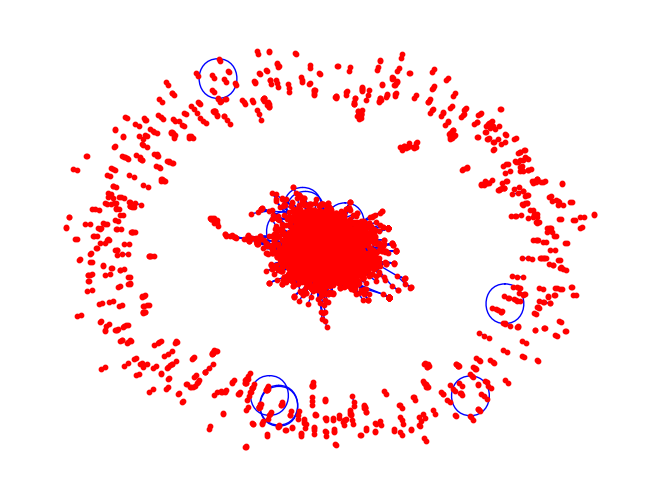

In [ ]:
nx.draw(G, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

In [ ]:
degree_dist = nx.degree_histogram(G)


In [ ]:
print(degree_dist)
print(type(degree_dist))

[0, 1196, 1114, 775, 497, 299, 225, 159, 141, 98, 92, 66, 46, 58, 38, 48, 25, 43, 20, 19, 28, 16, 12, 44, 8, 8, 7, 3, 5, 3, 8, 9, 3, 9, 37, 1, 2, 5, 1, 0, 1, 3, 19, 2, 1, 13, 2, 4, 3, 4, 0, 2, 0, 1, 1, 1, 3, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1]
<class 'list'>


In [ ]:
degree_counts = Counter(degree_dist)
degrees = list(degree_counts.keys())
counts = list(degree_counts.values())

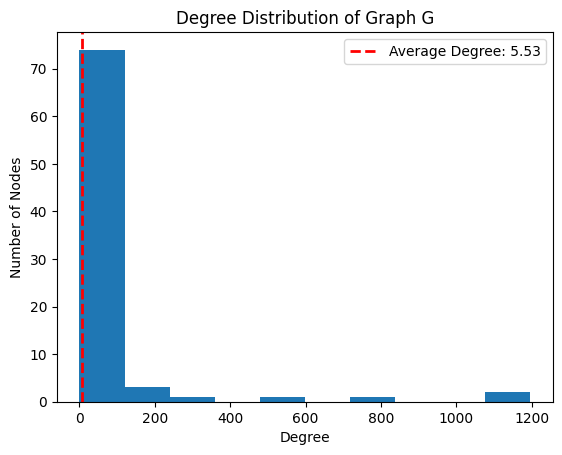

In [ ]:
plt.hist(degree_dist)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution of Graph G")
plt.axvline(x=average_degree, color='r', linestyle='dashed', linewidth=2, label=f'Average Degree: {average_degree:.2f}')
plt.legend()
plt.show()

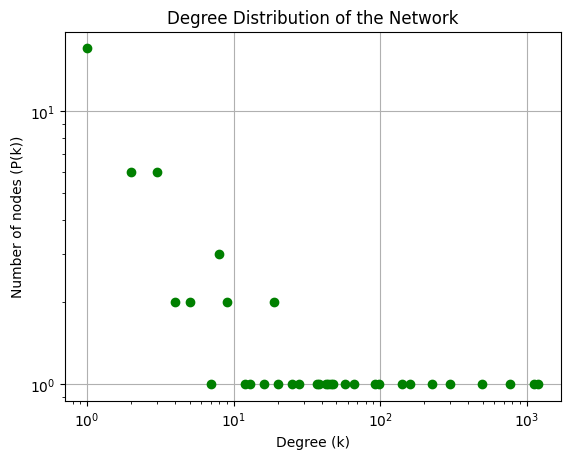

In [ ]:
# Plot the degree distribution on a log-log scale
plt.loglog(degrees, counts, marker='o',  linestyle='', color='g')
plt.xlabel("Degree (k)")
plt.ylabel("Number of nodes (P(k))")
plt.title("Degree Distribution of the Network")
plt.grid(True)
plt.show()


Min Degree:  0
Max Degree:  1196


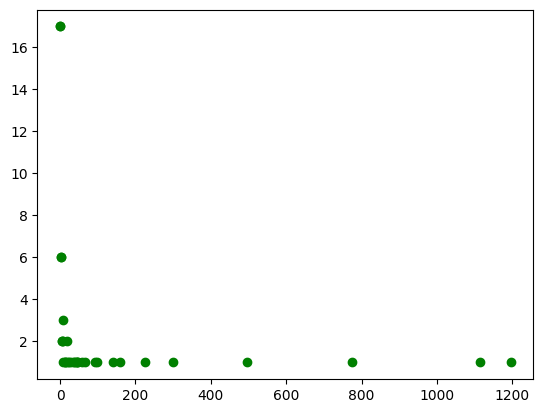

In [ ]:
plt.plot(degrees, counts, marker='o',  linestyle='', color='g')
print('Min Degree: ',min(degrees))
print('Max Degree: ',max(degrees))

In [ ]:
standard_deviation_degrees = statistics.stdev(degrees)

In [ ]:
print('Standard Deviation of Degree Distribution: ',standard_deviation_degrees)

Standard Deviation of Degree Distribution:  299.72513849404805


In [ ]:

degree_centrality = nx.degree_centrality(G)

# Find the node with the maximum degree centrality
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_degree_value = degree_centrality[max_degree_node]

# Print results

print("Maximum Degree Centrality:")
print(f"Node: {max_degree_node}, Degree: {max_degree_value}")


print("\nDegree of Some Nodes (Top 25):")
count = 0
for node, centrality in degree_centrality.items():
    if count < 25:
        print(f"{node}\t{centrality}")
        count += 1


Maximum Degree Centrality:
Node: 21012, Degree: 0.015455065827132226

Degree of Some Nodes (Top 25):
3466	0.0015264262545315779
937	0.0009540164090822362
5233	0.00038160656363289447
8579	0.0009540164090822362
10310	0.002480442663613814
15931	0.0019080328181644724
17038	0.003243655790879603
18720	0.0005724098454493417
19607	0.0007632131272657889
1854	0.0015264262545315779
4583	0.0005724098454493417
9572	0.006487311581759206
10841	0.0013356229727151307
13056	0.0019080328181644724
14982	0.00038160656363289447
16310	0.003243655790879603
19640	0.004770082045411181
23855	0.0015264262545315779
24372	0.00019080328181644724
24814	0.0040068689181453915
5052	0.00553329517267697
899	0.0005724098454493417
1796	0.00038160656363289447
2287	0.0026712459454302615
3096	0.0022896393817973667


AttributeError: 'NodeView' object has no attribute 'index'

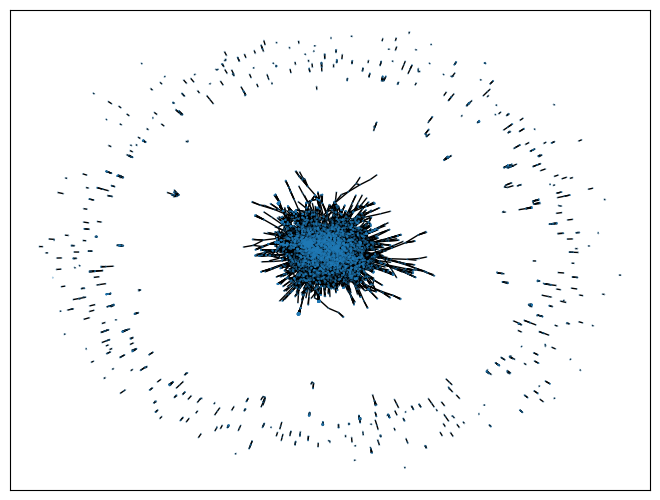

In [ ]:
# Visualization (Adjust node sizes based on degree centrality)
node_size = [degree_centrality[v] * 100 for v in G.nodes()]  # Scale node size by centrality

cmap = plt.cm.plasma


# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Degree Centrality Visualization")
plt.show()

In [ ]:
eigen_centrality_value = nx.eigenvector_centrality_numpy(G,max_iter=1000)
maximum = max(eigen_centrality_value.values())
print("Maximum eigen centrality are :")
print("Node Eigen Vector Centrality")
for node in eigen_centrality_value.keys():
  if (eigen_centrality_value[node] == maximum):
    print(f'{node}\t {eigen_centrality_value[node]}')
print("\nEigen Vector Centrality of some nodes are:\n")
print("Node \t Eigen Vector Centrality")
# sorting based on values
eigen_centrality_sorted = sorted(eigen_centrality_value, key=eigen_centrality_value.get, reverse=True)
w = 1
for q in eigen_centrality_value:
  if(w <= 25):
    w = w + 1
    print (str(q)+"\t "+str(eigen_centrality_value[q]))

Maximum eigen centrality are :
Node Eigen Vector Centrality
21012	 0.15556241521196248

Eigen Vector Centrality of some nodes are:

Node 	 Eigen Vector Centrality
3466	 3.489487249742381e-05
937	 1.459651004455049e-05
5233	 6.681307667568184e-06
8579	 5.131730740833322e-06
10310	 0.0002698840822696081
15931	 9.485775728003278e-05
17038	 0.001194704873491982
18720	 2.910632643933143e-06
19607	 3.0207162599887186e-06
1854	 8.173758651740826e-06
4583	 7.887328565060856e-06
9572	 0.0033703570789879703
10841	 1.0879332463058762e-05
13056	 9.268111873622859e-05
14982	 7.948087030238287e-06
16310	 0.00020072251334152247
19640	 0.008548790993501507
23855	 9.500661121503255e-06
24372	 5.916348750525446e-06
24814	 6.777606326425432e-06
5052	 0.00031787598382221815
899	 1.1014022910737555e-05
1796	 9.084863346407387e-06
2287	 0.0002851929139210494
3096	 9.955281900937215e-06


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


AttributeError: 'NodeView' object has no attribute 'index'

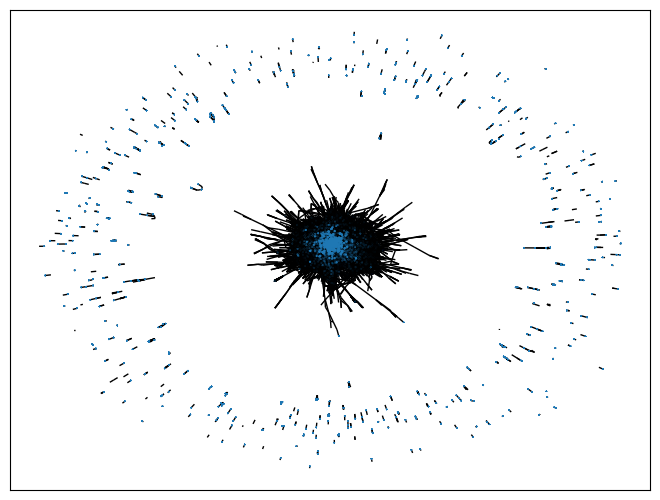

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in eigen_centrality_value.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Eigenvector Centrality Visualization")
plt.show()

In [ ]:
# take sample graph for 4000 edges

df=nx.to_pandas_edgelist(G);
df_sample=df.sample(n=2000)

g=nx.from_pandas_edgelist(df_sample)
print("No. of Nodes:",nx.number_of_nodes(g))
print("No. of Edges:",nx.number_of_edges(g))

No. of Nodes: 2184
No. of Edges: 2000


In [ ]:
# Define alpha and beta parameters (adjust as needed)
alpha = 0.1  # Damping factor
beta = 1  # Node contribution

# Calculate Katz centrality
katz_cent = nx.katz_centrality(g, alpha=alpha, beta=beta,max_iter=10000)
index = max(nx.katz_centrality(g, max_iter = 20000), key = (nx.katz_centrality(g, max_iter = 20000)).get)
maximum = katz_cent[index]
print("The nodes with maximum Katz centrality are :")
print("\nNode Degree")
for node in katz_cent:
  if (katz_cent[node] == maximum):
    print(f'{node}\t{katz_cent[node]}')
print("\nSome nodes with their Katz Centrality are:")
print("\nNode Katz Centrality")
w = 1
for node in katz_cent:
  if(w <= 25):
    print(f'{node}\t{katz_cent[node]}')
    w = w + 1


The nodes with maximum Katz centrality are :

Node Degree
3372	0.13235883470643445

Some nodes with their Katz Centrality are:

Node Katz Centrality
7463	0.016080023636063347
17861	0.01768802599966968
15614	0.018608427164444993
16368	0.021482647883000125
15245	0.035463610959444655
15457	0.04808188052309015
6610	0.08951269571015086
23382	0.02999446543444662
3843	0.02496116455205017
13404	0.01862410350977586
24293	0.02569084411094987
17439	0.025159175002979508
22601	0.021655912414535638
3877	0.02361691548362833
4705	0.019479167721328697
4773	0.024083534416951866
20574	0.04509979948471051
8727	0.049593501495171506
106	0.01626461617578849
15793	0.019533951396921136
21404	0.016080023636063347
25089	0.01768802599966968
14599	0.015901356706773756
12688	0.015901356706773756
11231	0.0175239441258323


AttributeError: 'NodeView' object has no attribute 'index'

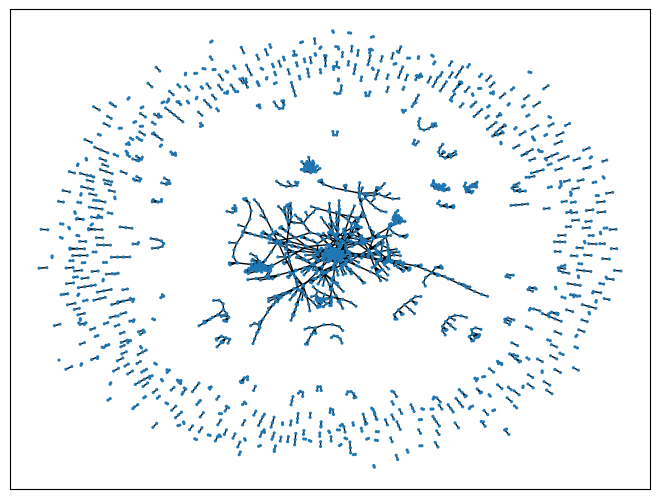

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in katz_cent.values()]  # Scale node size by centrality

# in statement above, katz_cent if cell above to above cell works




# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(g, nodelist=g.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Katz Centrality Visualization")
plt.show()

In [ ]:
#Page Rank
Page_Rank = nx.pagerank(G, max_iter = 20000)
maximum = max(Page_Rank.values())
print("Maximum Page Rank centrality are :")
print("\nNode Page Rank Centrality")
for node in Page_Rank.keys():
  if (Page_Rank[node] == maximum):
    print(f'{node}\t{Page_Rank[node]}')
print("\nPage Rank Centrality of some nodes are:")
print("\nNode Page Rank Centrality")
w = 1
for node in Page_Rank:
  if(w <= 25):
    print(f'{node}\t{Page_Rank[node]}')
    w = w + 1

Maximum Page Rank centrality are :

Node Page Rank Centrality
14265	0.0014490971768021381

Page Rank Centrality of some nodes are:

Node Page Rank Centrality
3466	0.00028791038987549284
937	0.00019009872909030306
5233	8.892996087934685e-05
8579	0.00019347739396011744
10310	0.00045337346602052374
15931	0.0003559651569003916
17038	0.0005581343689319253
18720	0.0001229699290307287
19607	0.0001573058715340158
1854	0.0003632799362289024
4583	0.0001311554371310703
9572	0.0011726979586704827
10841	0.00025722093312438186
13056	0.0003380219962708665
14982	8.707061431287568e-05
16310	0.0005885554290052198
19640	0.0004892533988425603
23855	0.00033566338338261785
24372	5.8309924939098945e-05
24814	0.000570008804388838
5052	0.0009509092481648861
899	0.00010919120705223895
1796	7.970879937681778e-05
2287	0.00047333625032555497
3096	0.00037163248183780343


AttributeError: 'NodeView' object has no attribute 'index'

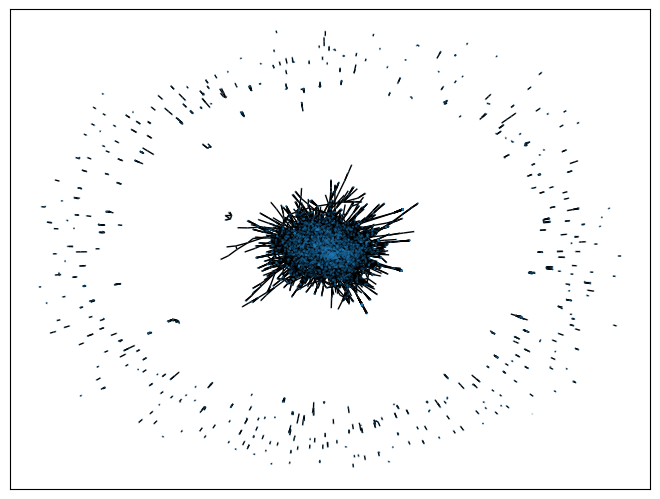

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in Page_Rank.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Page Rank Centrality Visualization")
plt.show()

In [ ]:
#Betweeness Centrality
bet_cent = nx.betweenness_centrality(G)
maximum = max(bet_cent.values())
print("Maximum Betweeness Centrality are :")
print("\nNode Betweeness Centrality")
for node in bet_cent:
  if (bet_cent[node] == maximum):
    print(f'{node}\t{bet_cent[node]}')
print("\nBetweeness Centrality of some nodes are:")
print("\nNode Betweenness Centrality")
w = 1
for res in bet_cent:
  if(w <= 25):
    w = w+1
    print(str(res)+"\t"+str(bet_cent[res]))


Maximum Betweeness Centrality are :

Node Betweeness Centrality
13801	0.037027150433897676

Betweeness Centrality of some nodes are:

Node Betweenness Centrality
3466	0.001715248119663197
937	0.0003493412893676944
5233	0.0
8579	0.00035838805830684087
10310	0.00875853820067516
15931	0.0030060929955505167
17038	0.00971923662472634
18720	0.0
19607	3.0514881952662607e-05
1854	0.0010775207556511723
4583	0.0003399339237399931
9572	0.025689005573850524
10841	0.002707168068342148
13056	0.00365890399868271
14982	0.0
16310	0.010148759874837855
19640	0.007180519085070411
23855	0.0034016137786973756
24372	0.0
24814	0.005502571992543268
5052	0.024422231614460266
899	5.773191655662977e-05
1796	0.0
2287	0.003721118433070327
3096	0.002171756980656998


AttributeError: 'NodeView' object has no attribute 'index'

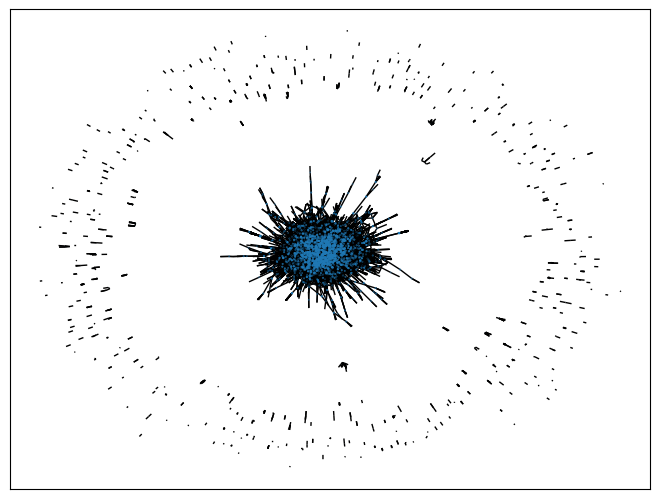

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in bet_cent.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Betweenness Centrality Visualization")
plt.show()

In [ ]:
#Closeness Centrality
Closeness_Centrality = nx.closeness_centrality(G)
maxi = max(Closeness_Centrality.values())
print("Maximum Closeness Centrality:")
print("\nNode Closeness Centrality")
for node in Closeness_Centrality:
  if (Closeness_Centrality[node] == maxi):
    print(f'{node}\t{Closeness_Centrality[node]}')
print("\nCloseness Centrality of some nodes:")
print("\nNode Closeness Centrality")
dict_sorted_keys = sorted(Closeness_Centrality, key=Closeness_Centrality.get, reverse=True)
w = 1
for q in dict_sorted_keys:
  if(w <= 25):
    w = w+1
    print (str(q)+"\t"+str(Closeness_Centrality[q]))

Maximum Closeness Centrality:

Node Closeness Centrality
13801	0.19428463503141283

Closeness Centrality of some nodes:

Node Closeness Centrality
13801	0.19428463503141283
14485	0.18953808583111678
9572	0.18903821471838708
17655	0.18896237842386998
2654	0.18712852106232164
21012	0.18654622580583352
12545	0.18598852330314233
25006	0.18560115626896184
12365	0.18530908453426106
22691	0.18475874375871945
20478	0.18466561417631516
2741	0.18366781089116016
7689	0.18348383645621075
13276	0.18338178760389917
5052	0.18298487935613003
18866	0.18250883101506185
23293	0.182105630239595
6610	0.18207546198675284
13096	0.1820453037278107
13929	0.18153413759390558
6700	0.18144422964550447
676	0.18122482912598148
16148	0.1811849951158428
10762	0.1804018460971772
1488	0.17942993802340593


AttributeError: 'NodeView' object has no attribute 'index'

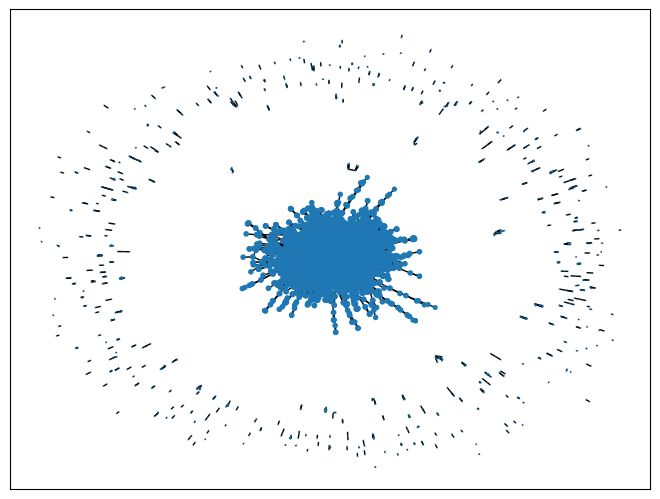

In [ ]:
# Visualization (Adjust node sizes or colors based on centrality)
node_size = [centrality * 100 for centrality in Closeness_Centrality.values()]  # Scale node size by centrality

# Optional: Choose a color map for node coloring (consider colorblind-friendly options)
cmap = plt.cm.plasma  # Example colormap

# Create the plot with node sizes and potential coloring based on centrality
nx.draw(G, nodelist=G.nodes(), node_size=node_size, with_labels=False, cmap=cmap)
plt.title("Closeness Centrality Visualization")
plt.show()

In [ ]:
#Average local clustering coeffecient
average_local_clustering=nx.average_clustering(G)

#Local clustering coeffecient of all nodes
print('\nClustering coeffecient of some nodes are:')
print('\nNode Local Clustering Coeffecient')
w = 1
for node, val in nx.clustering(G).items():
  if(w <= 25):
    print(f'{node}\t{val}')
    w = w + 1


Clustering coeffecient of some nodes are:

Node Local Clustering Coeffecient
3466	0.21428571428571427
937	0.3
5233	1.0
8579	0.3
10310	0.05128205128205128
15931	0.2
17038	0.1323529411764706
18720	1.0
19607	0.6666666666666666
1854	0.25
4583	0.3333333333333333
9572	0.0659536541889483
10841	0.09523809523809523
13056	0.17777777777777778
14982	1.0
16310	0.08823529411764706
19640	0.24333333333333335
23855	0.14285714285714285
24372	0
24814	0.26666666666666666
5052	0.06157635467980296
899	0.6666666666666666
1796	1.0
2287	0.17582417582417584
3096	0.2727272727272727


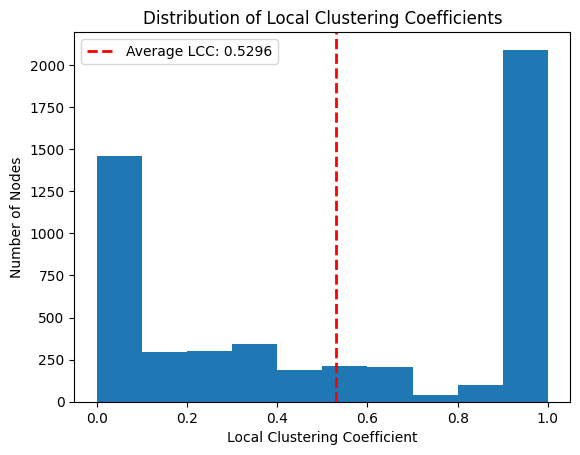

In [ ]:
clustering_coefficients = nx.clustering(G)

# Get LCC distribution
lcc_distribution = [val for node, val in clustering_coefficients.items()]  # Extract LCC values

# Calculate average local clustering coefficient
average_lcc = nx.average_clustering(G)

plt.hist(lcc_distribution)
plt.xlabel("Local Clustering Coefficient")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Local Clustering Coefficients")

# Add reference line for average LCC
plt.axvline(x=average_lcc, color='r', linestyle='dashed', linewidth=2, label=f'Average LCC: {average_lcc:.4f}')
plt.legend()
plt.show()

In [ ]:
print("average local clustering coefficient:",average_local_clustering)

average local clustering coefficient: 0.529635811052136


In [ ]:
# global clustering coeffecient of nodes
global_clustering = np.mean(list(nx.clustering(G).values()))

In [ ]:
print("Global clustering coefficient:",global_clustering)


Global clustering coefficient: 0.5296358110521362


In [ ]:
if(G.is_directed()):
  print("Reciprocity: ",nx.reciprocity(G))
else:
  print("Reciprocity: 1.0")


Reciprocity: 1.0


In [ ]:
def is_reciprocal(G, node1, node2):
    return G.has_edge(node2, node1)

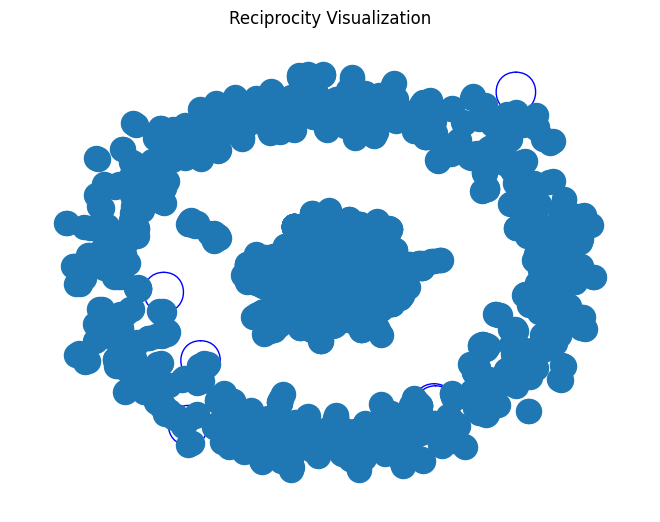

In [ ]:
edge_colors = []
for edge in G.edges():
    if is_reciprocal(G, edge[0], edge[1]):
        edge_colors.append('blue')  # Color for reciprocal edges
    else:
        edge_colors.append('red')  # Color for non-reciprocal edges

# Create the plot with edge coloring based on reciprocity
nx.draw(G, nodelist=G.nodes(), edge_color=edge_colors, with_labels=False)
plt.title("Reciprocity Visualization")
plt.axis('off')  # Hide unnecessary axis

plt.show()

In [ ]:

#Transitivity
transitivity=nx.transitivity(G)


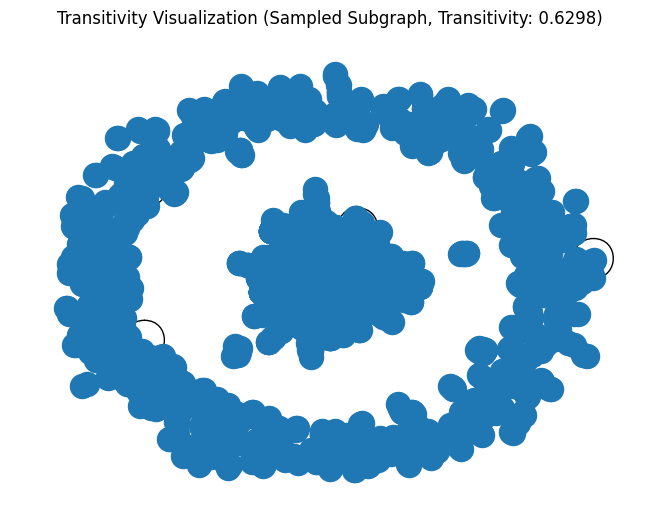

In [ ]:
# Create the plot with the sampled subgraph
nx.draw(G, nodelist=G.nodes(), with_labels=False)
plt.title(f"Transitivity Visualization (Sampled Subgraph, Transitivity: {transitivity:.4f})")
plt.axis('off')  # Hide unnecessary axis

plt.show()

In [ ]:

print("transitivity:",transitivity)

transitivity: 0.6298424741263426


In [ ]:

# Comparison (Optional)
if average_local_clustering > global_clustering:
    print("The average local clustering coefficient is higher than the global clustering coefficient.")
elif average_local_clustering < global_clustering:
    print("The average local clustering coefficient is lower than the global clustering coefficient.")
else:
    print("The average local clustering coefficient is equal to the global clustering coefficient.")


The average local clustering coefficient is lower than the global clustering coefficient.
